# 01 Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import data

In [2]:
#create path
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A4 - Python Fundamentals for Data Analysts\02-2022 Instacart Basket Analysis'

In [5]:
#import data
df_all = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

# 03 Visualizations - Part 2,Q2

## Bar Chart

Text(0, 0.5, '# of Orders in millions')

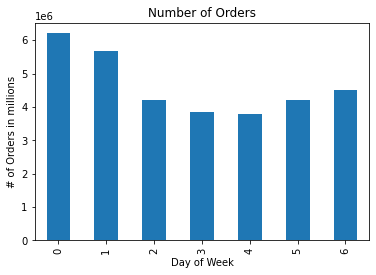

In [6]:
df_all['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Number of Orders')
plt.xlabel('Day of Week')
plt.ylabel('# of Orders in millions')

In [7]:
df_all['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

## Histogram

<AxesSubplot:ylabel='Frequency'>

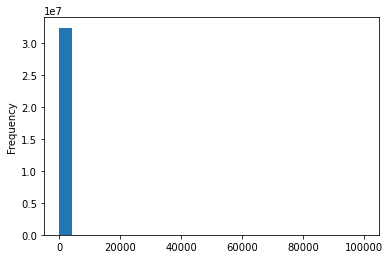

In [8]:
 df_all['prices'].plot.hist(bins=25)

In [9]:
df_all['prices'].value_counts(dropna=False).sort_index()

1.0        115143
1.1        242782
1.2        256258
1.3        425691
1.4        392209
            ...  
24.8          410
24.9         5781
25.0        13772
14900.0      4429
99999.0       698
Name: prices, Length: 242, dtype: int64

In [10]:
#get rid of any value over $25
df_all.loc[df_all['prices']>25,'prices']=np.nan

In [11]:
df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all2.pkl'))


In [12]:
df_all['prices'].max()

25.0

Text(0.5, 0, 'Price')

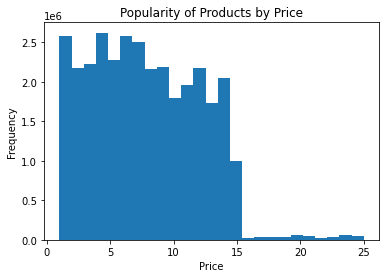

In [13]:
 df_all['prices'].plot.hist(bins=25)
plt.title('Popularity of Products by Price')
plt.xlabel('Price')

#in the exercise, I performed the data removal of any value over 100, but didn't save the dataset then.

## Scatterplot

[Text(0.5, 1.0, 'Price of Products')]

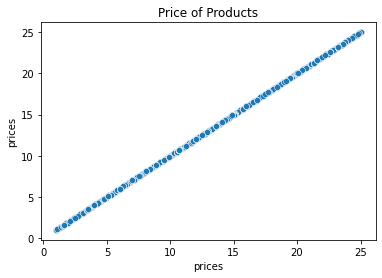

In [14]:
#scatterplot of cleaned up dataset after renaming prices>25 to nan 
sns.scatterplot(x='prices', y='prices', data=df_all).set(title='Price of Products')


## Line Chart

### Create subset of data 70/30 split and use 30% for line graph

In [15]:
# name a random seed & name a variable for the random values for all records
np.random.seed(4)
dev = np.random.rand(len(df_all)) <=0.7

In [16]:
#name 70% sample/subset of df_all to big
big=df_all[dev]

In [17]:
#name 30% sample/subset of df_all to small
small=df_all[~dev]

In [18]:
len(df_all)

32404859

In [19]:
len(big)+len(small)

32404859

In [20]:
#name small dataframe
df_thirty=small[['orders_day_of_week','prices']]

[Text(0.5, 1.0, 'Price of Orders by Day of Week')]

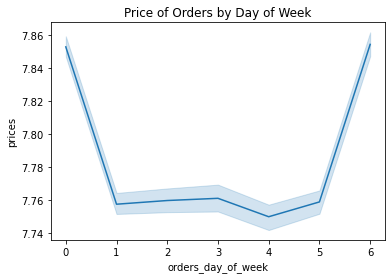

In [21]:
sns.lineplot(data=df_thirty, x = 'orders_day_of_week', y = 'prices').set(title='Price of Orders by Day of Week')

# 04 Histogram - Part 2,Q3

Text(0.5, 0, 'hour_of_day')

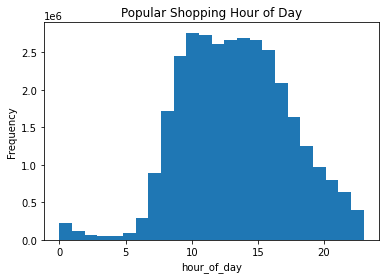

In [22]:
 df_all['order_hour_of_day'].plot.hist(bins=24)
plt.title('Popular Shopping Hour of Day')
plt.xlabel('hour_of_day')

### This histogram illustrates peak hours that orders are made. 
### Very few orders are made between 0 and 5 hours.
### Peak ordering takes place at hours 10-15.

In [23]:
#reference for column names in df
df_all.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_product_price', 'spending_flag', 'median_dspo',
       'order_freq_flag', 'First Name', 'Last Name', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

# 05 Bar Chart - Part 2,Q4

Text(0, 0.5, 'count in 10 million')

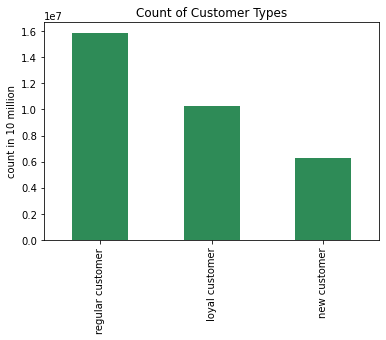

In [24]:
df_all['loyalty_flag'].value_counts().plot.bar(color=['seagreen'])
plt.title('Count of Customer Types')
plt.ylabel('count in 10 million')

In [25]:
df_all['loyalty_flag'].value_counts(dropna=False)

regular customer    15876776
loyal customer      10284093
new customer         6243990
Name: loyalty_flag, dtype: int64

# 06 Line Chart - Part 2,Q5

In [26]:
# x-axis = hours of the day, y-axis = prices
# use small df to subset df_thirty_2 with order hour of day and prices columns
df_thirty_2=small[['order_hour_of_day', 'prices']]

[Text(0.5, 1.0, 'Price of Purchases by Hour of Day')]

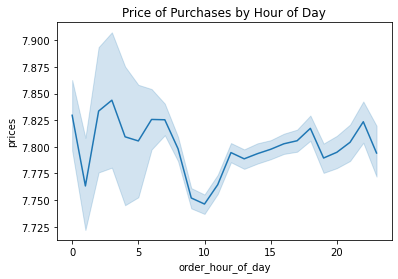

In [27]:
sns.lineplot(data=df_thirty_2, x = 'order_hour_of_day', y = 'prices').set(title='Price of Purchases by Hour of Day')

### This line chart shows that during peak hours of shopping, average price of items are lower. The price dip is not significant, though, as the average prices range from approximately 7.75-7.84 throughout the day.

# 07 Line Chart - Part 2,Q6

In [28]:
# customer demographics: x-axis = age, y-axis = number of dependents
df_thirty_3 = small[['Age','n_dependants']]

[Text(0.5, 1.0, 'Number of Dependants by Age')]

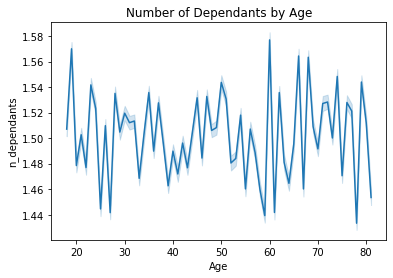

In [29]:
sns.lineplot(data = df_thirty_3, x= 'Age', y = 'n_dependants').set(title='Number of Dependants by Age')

### This line chart shows that for all age groups, the average number of dependents range from 1.43 to about 1.6. Not a huge variance by age.

In [30]:
df_thirty_3.groupby('Age')['n_dependants'].mean()

Age
18    1.507060
19    1.570024
20    1.478526
21    1.502664
22    1.476968
        ...   
77    1.521253
78    1.433320
79    1.543994
80    1.512084
81    1.453486
Name: n_dependants, Length: 64, dtype: float64

# 08 Scatterplot - Part 2,Q7

[Text(0.5, 1.0, 'Buying Power by Age')]

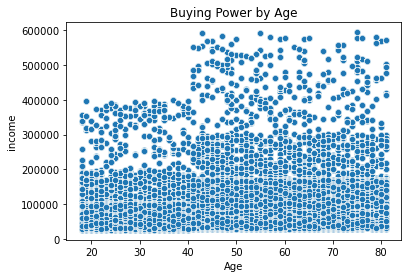

In [31]:
# x-axis = 'Age', y-axis = 'income'

sns.scatterplot(x='Age', y='income', data=df_all).set(title='Buying Power by Age')

### This scatterplot shows that at age 40, a group of our customers have a jump in spending power.

# 09 Export all visualizations

Text(0, 0.5, '# of Orders in millions')

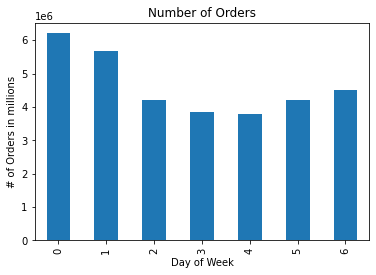

In [32]:
# bar chart orders by day of week
bar= df_all['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Number of Orders')
plt.xlabel('Day of Week')
plt.ylabel('# of Orders in millions')


In [33]:
#export bar orders dow
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow_4_9.png'))

Text(0.5, 0, 'Price')

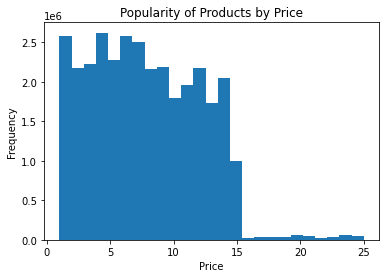

In [34]:
# histogram variable sales count by price
hist1= df_all['prices'].plot.hist(bins=25)
plt.title('Popularity of Products by Price')
plt.xlabel('Price')

In [35]:
#export histogram popular products by price

hist1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_sales_price_4_9.png'))

[Text(0.5, 1.0, 'Price of Products')]

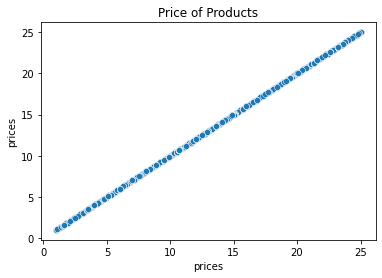

In [36]:
# scatterplot variable product prices
scatter = sns.scatterplot(x='prices', y='prices', data=df_all)
scatter.set(title='Price of Products')

In [37]:
#export scatterplot product prices

scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_prod_price_4_9.png'))

[Text(0.5, 1.0, 'Price of Orders by Day of Week')]

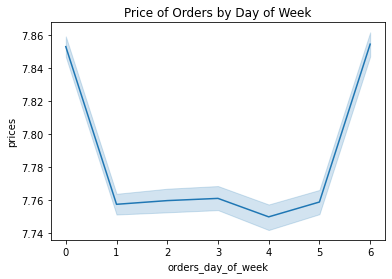

In [38]:
# line variable price dow
line = sns.lineplot(data=df_thirty, x = 'orders_day_of_week', y = 'prices')
line.set(title='Price of Orders by Day of Week')

In [39]:
#export line price dow

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_dow_4_9.png'))

Text(0.5, 0, 'hour_of_day')

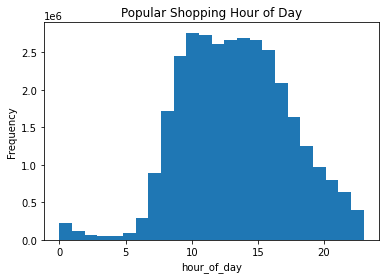

In [40]:
# histogram variable shopping hod
hist2 = df_all['order_hour_of_day'].plot.hist(bins=24)
plt.title('Popular Shopping Hour of Day')
plt.xlabel('hour_of_day')

In [41]:
#export histogram popular shopping hour of day

hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_shopping_hod_4_9.png'))

Text(0, 0.5, 'count in 10 million')

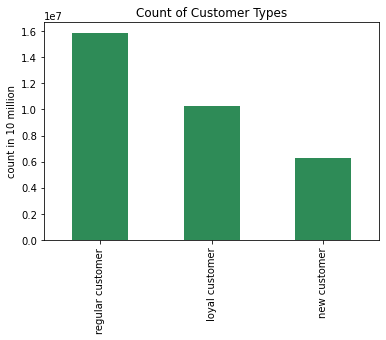

In [42]:
# bar variable cust_loyalty
bar2=df_all['loyalty_flag'].value_counts().plot.bar(color=['seagreen'])
plt.title('Count of Customer Types')
plt.ylabel('count in 10 million')

In [43]:
#export bar customer loyalty

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_loyalty_4_9.png'))

[Text(0.5, 1.0, 'Price of Purchases by Hour of Day')]

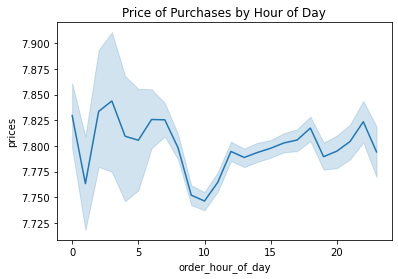

In [44]:
# line variable price by hod
line2=sns.lineplot(data=df_thirty_2, x = 'order_hour_of_day', y = 'prices')
line2.set(title='Price of Purchases by Hour of Day')

In [45]:
#export line price by hod

line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_hod_4_9.png'))

[Text(0.5, 1.0, 'Number of Dependants by Age')]

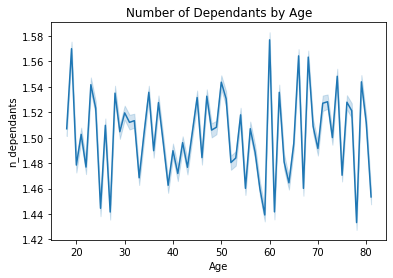

In [46]:
# line variable dep by age
line3 = sns.lineplot(data = df_thirty_3, x= 'Age', y = 'n_dependants')
line3.set(title='Number of Dependants by Age')

In [47]:
#export line dependents by age

line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependents_by_age_4_9.png'))

[Text(0.5, 1.0, 'Buying Power by Age')]

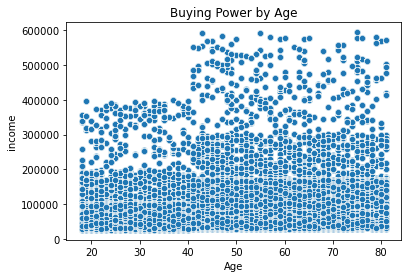

In [48]:
# scatter variable buying power by age
scatter2 = sns.scatterplot(x='Age', y='income', data=df_all)
scatter2.set(title='Buying Power by Age')

In [49]:
#export scatterplot buying power by age

scatter2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_buying_power_by_age_4_9.png'))